### 1 ) 라이브러리 호출

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(np.__version__)

2.6.0
1.21.4


In [2]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


### 2 ) 이미지 리사이즈

In [3]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.NEAREST)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor/train"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1000  images to be resized.
1000  images resized.
가위 이미지 resize 완료!


In [4]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock/train"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

1000  images to be resized.
1000  images resized.
바위 이미지 resize 완료!


In [5]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper/train"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1000  images to be resized.
1000  images resized.
보 이미지 resize 완료!


### 3 ) 이미지 로드

In [6]:
import numpy as np

def load_data(img_path, number_of_data=3000):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/train/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/train/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/train/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
x_train, y_train=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3000 입니다.
x_train shape: (3000, 28, 28, 3)
y_train shape: (3000,)


### 4 ) 이미지 출력

라벨:  0


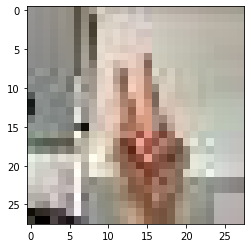

In [7]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

### 5 ) 모델 생성

In [8]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=6
n_channel_2=16
n_channel_3=32
n_dense=32
n_train_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.AveragePooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 6)         168       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 32)          4640      
_________________________________________________________________
average_pooling2d (AveragePo (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                1

### 6 ) 모델 학습

In [9]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
opt = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size = 300, epochs=200)

Epoch 1/200
10/10 [==============================] - 3s 5ms/step - loss: 7.1383 - accuracy: 0.2283
Epoch 2/200
10/10 [==============================] - 0s 5ms/step - loss: 3.0715 - accuracy: 0.3777
Epoch 3/200
10/10 [==============================] - 0s 5ms/step - loss: 2.1321 - accuracy: 0.3237
Epoch 4/200
10/10 [==============================] - 0s 4ms/step - loss: 1.7065 - accuracy: 0.4433
Epoch 5/200
10/10 [==============================] - 0s 4ms/step - loss: 1.3816 - accuracy: 0.4547
Epoch 6/200
10/10 [==============================] - 0s 4ms/step - loss: 1.1246 - accuracy: 0.5553
Epoch 7/200
10/10 [==============================] - 0s 4ms/step - loss: 0.9227 - accuracy: 0.5917
Epoch 8/200
10/10 [==============================] - 0s 4ms/step - loss: 0.7812 - accuracy: 0.6523
Epoch 9/200
10/10 [==============================] - 0s 4ms/step - loss: 0.6861 - accuracy: 0.6830
Epoch 10/200
10/10 [==============================] - 0s 4ms/step - loss: 0.6136 - accuracy: 0.7143
Epoch 11/

10/10 [==============================] - 0s 4ms/step - loss: 0.0139 - accuracy: 1.0000
Epoch 84/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0133 - accuracy: 1.0000
Epoch 85/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0127 - accuracy: 1.0000
Epoch 86/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0121 - accuracy: 1.0000
Epoch 87/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0116 - accuracy: 1.0000
Epoch 88/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0111 - accuracy: 1.0000
Epoch 89/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 90/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0100 - accuracy: 1.0000
Epoch 91/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0095 - accuracy: 1.0000
Epoch 92/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0091 - accuracy: 1.0000
Epoch 93/200


10/10 [==============================] - 0s 4ms/step - loss: 8.8708e-04 - accuracy: 1.0000
Epoch 165/200
10/10 [==============================] - 0s 4ms/step - loss: 8.6831e-04 - accuracy: 1.0000
Epoch 166/200
10/10 [==============================] - 0s 4ms/step - loss: 8.5109e-04 - accuracy: 1.0000
Epoch 167/200
10/10 [==============================] - 0s 4ms/step - loss: 8.3446e-04 - accuracy: 1.0000
Epoch 168/200
10/10 [==============================] - 0s 4ms/step - loss: 8.2069e-04 - accuracy: 1.0000
Epoch 169/200
10/10 [==============================] - 0s 4ms/step - loss: 8.0374e-04 - accuracy: 1.0000
Epoch 170/200
10/10 [==============================] - 0s 4ms/step - loss: 7.8638e-04 - accuracy: 1.0000
Epoch 171/200
10/10 [==============================] - 0s 4ms/step - loss: 7.7399e-04 - accuracy: 1.0000
Epoch 172/200
10/10 [==============================] - 0s 4ms/step - loss: 7.5659e-04 - accuracy: 1.0000
Epoch 173/200
10/10 [==============================] - 0s 4ms/step - 

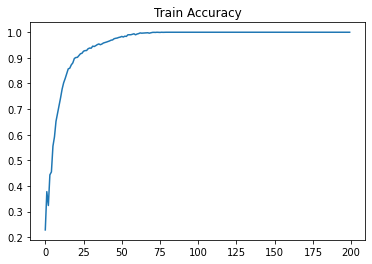

In [10]:
plt.plot(history.history['accuracy'])
plt.title('Train Accuracy')
plt.show()

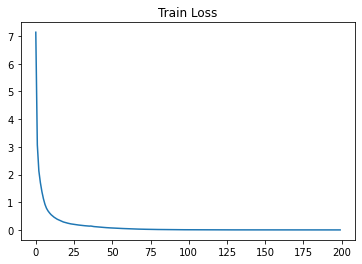

In [11]:
plt.plot(history.history['loss'])
plt.title('Train Loss')
plt.show()

### 7 ) 테스트 이미지 리사이즈 및 호출

In [12]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor/test"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper/test"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock/test"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")



import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
x_test, y_test=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
학습데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


### 8 ) 테스트 결과

In [13]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=100, verbose=2)

3/3 - 0s - loss: 3.0285 - accuracy: 0.6167


### 9 ) 회고

#### 데이터의 다양성에 비례하여 성능 증가가 일어났다. -> 단순히 많은 데이터가 아니라 다양한 표현을 가지는 데이터셋이 성능에 도움이 될 수 있음을 알게되었다.
#### MaxPool 대신 AvgPool을 사용하였다. -> 적절한 Pooling 기법을 사용하는 것이 성능개선에 큰 도움이 된다는 것을 알게되었다.
#### Adam보다 SGD가 이번 task에서는 성능이 더욱 좋았다. -> 보편적으로는 Adam optimizer가 제일 좋은 성능을 보인다지만 결국 업무에 따라 적절한 optimizer를 선택하는 것이 올바르다는 것을 알게 되었다.